findospark.initt(): Initializing SparkContext
init() take SPARk_HOME Envirnment variable

In [1]:
import findspark
findspark.init()

In [2]:
#import spark context
from pyspark import SparkContext

In [3]:
#craete spark context
sc = SparkContext.getOrCreate()
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [4]:
my_rdd = sc.parallelize([1,2,3,4,5,6,7,8,9,10])

In [15]:
my_rdd.sum()

55

In [18]:
my_rdd.max()

10

In [6]:
x = sc.parallelize(['A','B','C','C','D','D','D','E','E','E','E'])
y = x.distinct()

In [7]:
# The collect() method in Apache Spark's Resilient Distributed Dataset (RDD) is used to retrieve all the elements of the RDD to the driver program as an array.
# It's important to note that collect() should be used with caution, as it can cause the driver program to run out of memory if the RDD is too large.
print("X:",x.collect())
print("Y:",y.collect())

X: ['A', 'B', 'C', 'C', 'D', 'D', 'D', 'E', 'E', 'E', 'E']
Y: ['B', 'C', 'A', 'D', 'E']


In [24]:
print(type(x))
print(type(y))

<class 'pyspark.rdd.RDD'>
<class 'pyspark.rdd.PipelinedRDD'>


In [28]:
#dir will list all the methods and attributes of the object
# dir(x)

In [38]:
# help will give you the documentation of the function with the example
help(x.filter)

Help on method filter in module pyspark.rdd:

filter(f: Callable[[~T], bool]) -> 'RDD[T]' method of pyspark.rdd.RDD instance
    Return a new RDD containing only the elements that satisfy a predicate.
    
    Examples
    --------
    >>> rdd = sc.parallelize([1, 2, 3, 4, 5])
    >>> rdd.filter(lambda x: x % 2 == 0).collect()
    [2, 4]



#### SparkContext vs SparkSession

In Apache Spark, a SparkContext is the entry point to any Spark functionality and represents the connection to a Spark cluster. It is responsible for managing the distribution of data and computation across a cluster of machines. Each Spark application has only one SparkContext, which is created automatically when you create a SparkSession.

A SparkSession, on the other hand, is a higher-level API that provides a convenient way to create a SparkContext, as well as access Spark's SQL, streaming, and other high-level APIs. It represents the combination of a SparkContext, a SqlContext, and a StreamingContext, and is the preferred way to interact with Spark in a structured way.

In summary, you can think of a SparkContext as the low-level connection to the Spark cluster, while a SparkSession is a higher-level API that provides access to Spark's functionality through a more convenient and structured interface. When you start a Spark application, you create a SparkSession, which in turn creates a SparkContext for you.


In [6]:
# Create a SparkSession
# from pyspark.sql import SparkSession
# spark = SparkSession.builder.appName("Read CSV file into RDD Example").getOrCreate()

#craete spark context
# sc = SparkContext.getOrCreate()

##### Spark Transformation vs Spark Action

In Apache Spark, transformations and actions are two important concepts that define how Spark processes data.

A *transformation* is a lazy operation that returns a new RDD or DataFrame based on the existing one. It doesn't actually execute the operation until an action is called. Some common transformations include map, filter, reduceByKey, groupByKey, flatMap, and union.

An *action*, on the other hand, is an operation that triggers the computation and returns a result to the driver program. It forces the execution of the transformations and brings the data back to the driver. Some common actions include count, first, take, reduce, collect, and foreach.

The distinction between transformations and actions is important because it allows Spark to optimize the execution plan for the operations by performing optimizations such as pipelining, data partitioning, and data caching. When you perform transformations on an RDD or DataFrame, Spark builds up a logical execution plan, but it doesn't actually execute the operations until an action is called. This allows Spark to optimize the operations for maximum performance.

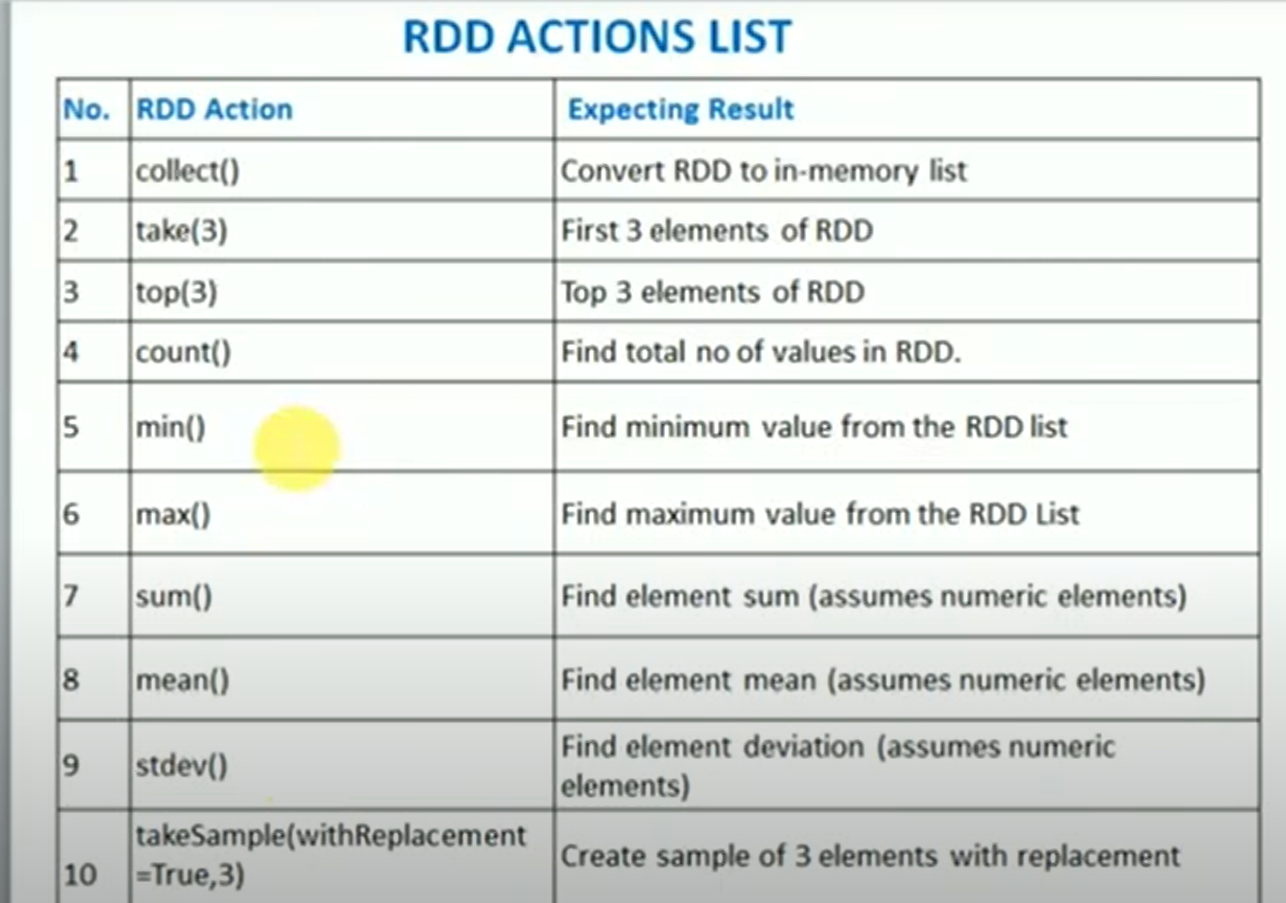
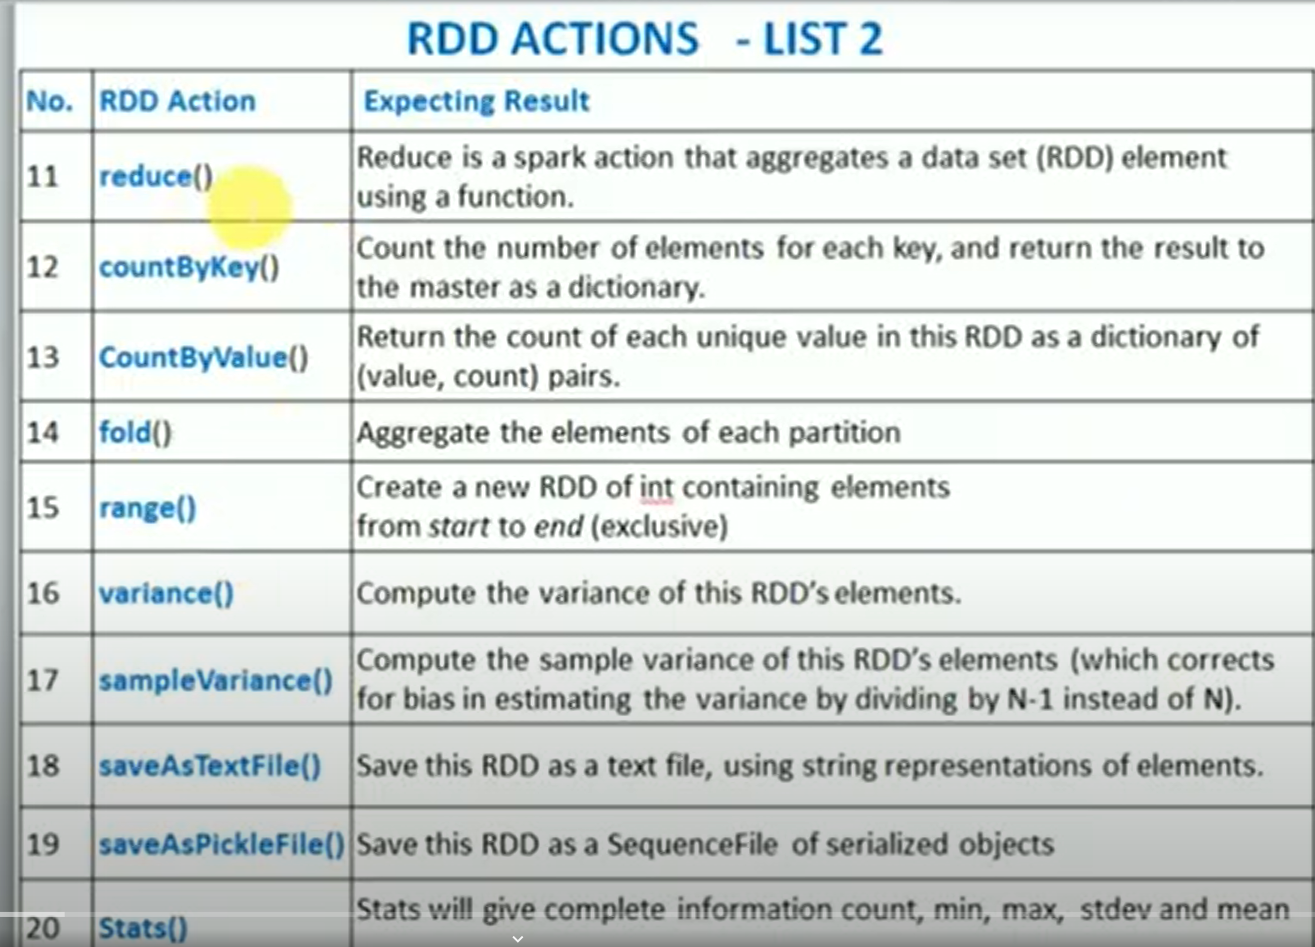

In [15]:
# reduce() is an action that returns a result from a collection by repetitively applying the operation passed as a parameter.
rdd = sc.parallelize([1,2,3,4,5,6,7,8,9,10])
rdd.reduce(lambda x, y: x+y)

55

In [9]:
rdd.take(3)

[1, 2, 3]

In [11]:
rdd.takeSample(False, 3)

[3, 6, 1]

In [17]:
# rdd.takeOrdered(True,3)

In [ ]:
rdd.takeOrdered(False,3)

In [9]:
#CountByValue() is an action that returns the count of each unique value in the RDD as a dictionary of (value, count) pairs.
rdd = sc.parallelize([1,2,3,4,5,6,7,8,9,10,1,2,3,4,5,6,7,8,9,10])
x.countByValue()

defaultdict(int, {'A': 1, 'B': 1, 'C': 2, 'D': 3, 'E': 4})

In [12]:
#CountByKey() is an action that returns the count of each unique key in the RDD as a dictionary of (key, count) pairs.
rdd= sc.parallelize([(1,2),(3,4),(3,6)])
rdd.countByKey()

defaultdict(int, {1: 1, 3: 2})

In [5]:
# fold() aggregates the elements of each partition, and then the results for all the partitions are aggregated using a given associative and commutative function.
from operator import add
x_fold = sc.parallelize([1,2,3])
x_fold.fold(1, add)

15

In [6]:
rdd = sc.parallelize([1, 2, 3, 4, 5])

# Initial value is 0 and binary operator is sum
result = rdd.fold(1, lambda x, y: x + y)

print("Sum of elements in the RDD:", result)

Sum of elements in the RDD: 24


In [4]:
#Range
x_range = sc.parallelize(range(1, 11))
x_range.collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [8]:
#varaincce
sc.parallelize([1,2,3,4,5,6,7,8,9,10]).variance()

8.25

In [9]:
sc.parallelize([1,2,3,4,5,6,7,8,9,10]).sampleVariance()

9.166666666666666

In [15]:
sc.stop()